In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
import scipy as sci

%matplotlib inline

In [2]:
train = pd.read_csv("datasets/train.csv", parse_dates=["datetime"])
test = pd.read_csv("datasets/test.csv", parse_dates=["datetime"])

In [3]:
print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


In [4]:
# 결측치 있는지 확인
# train.isna().sum()
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [5]:
print(train.columns)
print(test.columns)
common_columns = set(train.columns) & set(test.columns) #test에도 있는 columns만 사용하기 위해 공통으로 있는 column 정리
# common_columns.add("count") # test의 count를 예측하기 위한거라 test에는 count가 없지만 사용해야 하므로 추가

common_columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')


{'atemp',
 'datetime',
 'holiday',
 'humidity',
 'season',
 'temp',
 'weather',
 'windspeed',
 'workingday'}

In [6]:
train = pd.concat([train.loc[:,common_columns], train.loc[:,"count"]], axis=1) # train에서 common column만 사용

In [7]:
train.shape

(10886, 10)

In [8]:
# datetime을 연월일시분초로 분할
train["year"] = train.datetime.dt.year
train["month"] = train.datetime.dt.month
train["day"] = train.datetime.dt.day
train["hour"] = train.datetime.dt.hour
train["min"] = train.datetime.dt.minute
train["sec"] = train.datetime.dt.second

test["year"] = test.datetime.dt.year
test["month"] = test.datetime.dt.month
test["day"] = test.datetime.dt.day
test["hour"] = test.datetime.dt.hour
test["min"] = test.datetime.dt.minute
test["sec"] = test.datetime.dt.second

train = train.loc[:, train.columns != "datetime"]
test = test.loc[:, test.columns != "datetime"]

In [9]:
categorical_columns = ["holiday","season","workingday","weather", "year", "month", "day", "hour", "min", "sec"]
numerical_columns = list(set(train.columns) - set(categorical_columns))
# categorical variable을 category로 변환
for col in categorical_columns:
    train.loc[:,col] = train.loc[:,col].astype('category')
    test.loc[:,col] = test.loc[:,col].astype('category')

In [10]:
print(len(categorical_columns), len(numerical_columns))

10 5


C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has

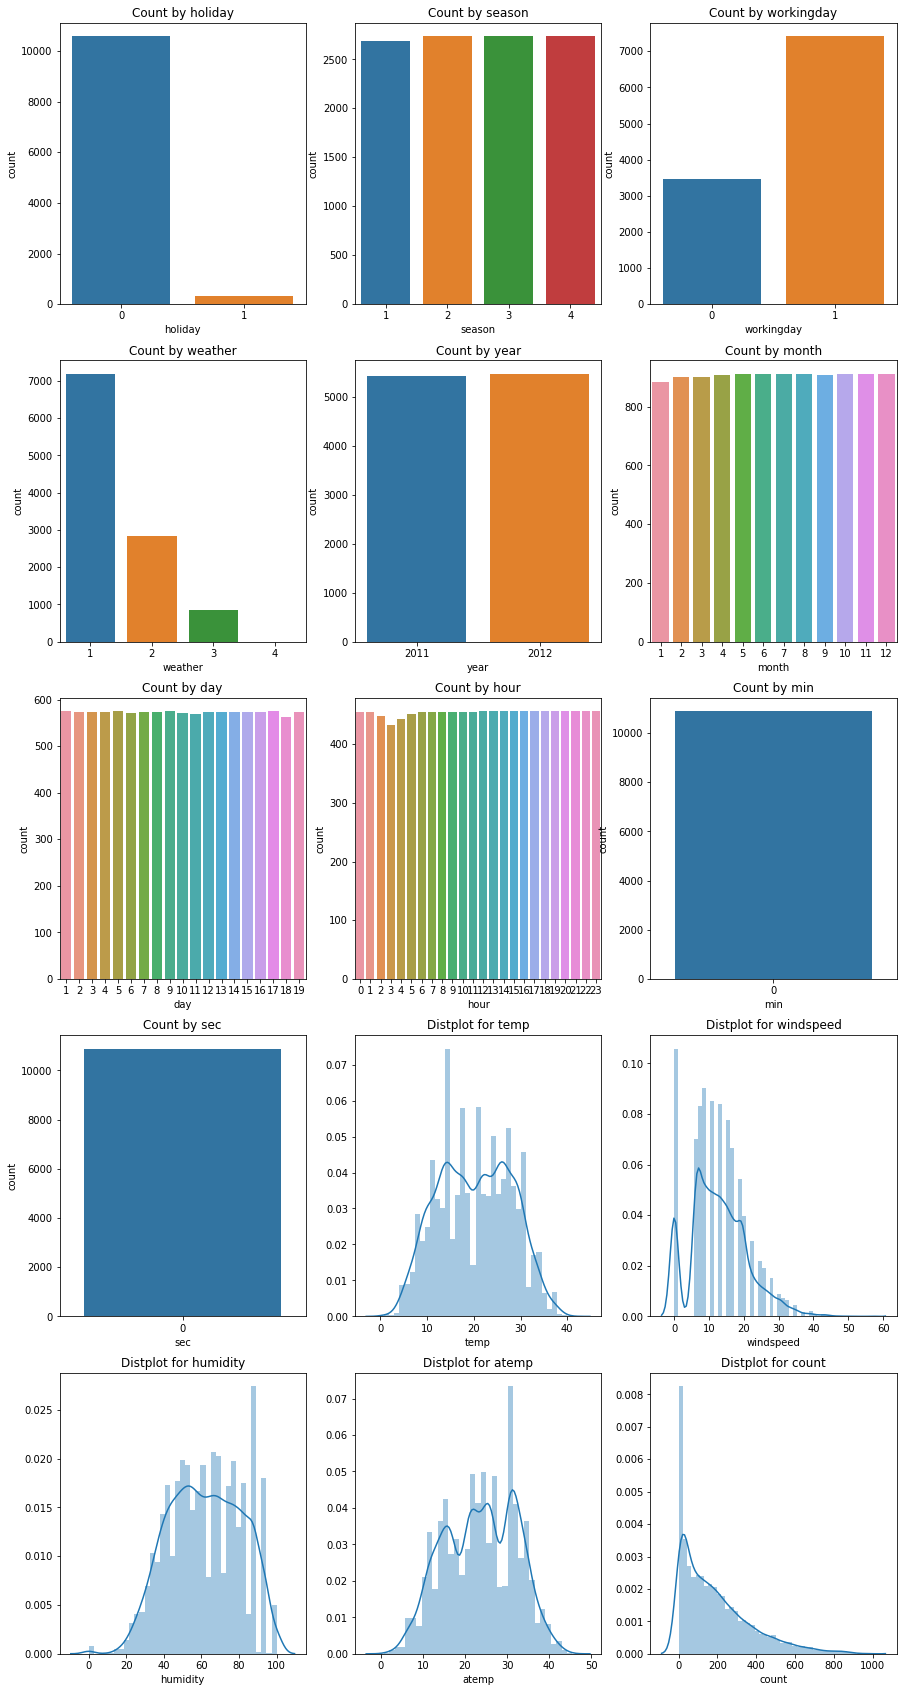

In [11]:
nrows = 5
ncols = 3
figure, axes = plt.subplots(nrows = nrows, ncols = ncols)
figure.set_size_inches(15,30)
# figure.set(title = "Frequency")


# Categorical varible 의 category별 frequency 비교
for i in range(len(categorical_columns)):
    row_index = i // ncols
    col_index = i % ncols
    sns.countplot(data = train, x = categorical_columns[i], ax = axes[row_index][col_index])
    axes[row_index][col_index].set_title("Count by " + categorical_columns[i])


# Numerical variable의 distribution
for i in range(len(numerical_columns)):
    row_index = (i + len(categorical_columns)) // ncols
    col_index = (i + len(categorical_columns)) % ncols
    sns.distplot(train[numerical_columns[i]], ax = axes[row_index][col_index])
    axes[row_index][col_index].set_title("Distplot for " + numerical_columns[i])

In [12]:
numerical_columns

['temp', 'windspeed', 'humidity', 'atemp', 'count']

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


KeyError: 'count'

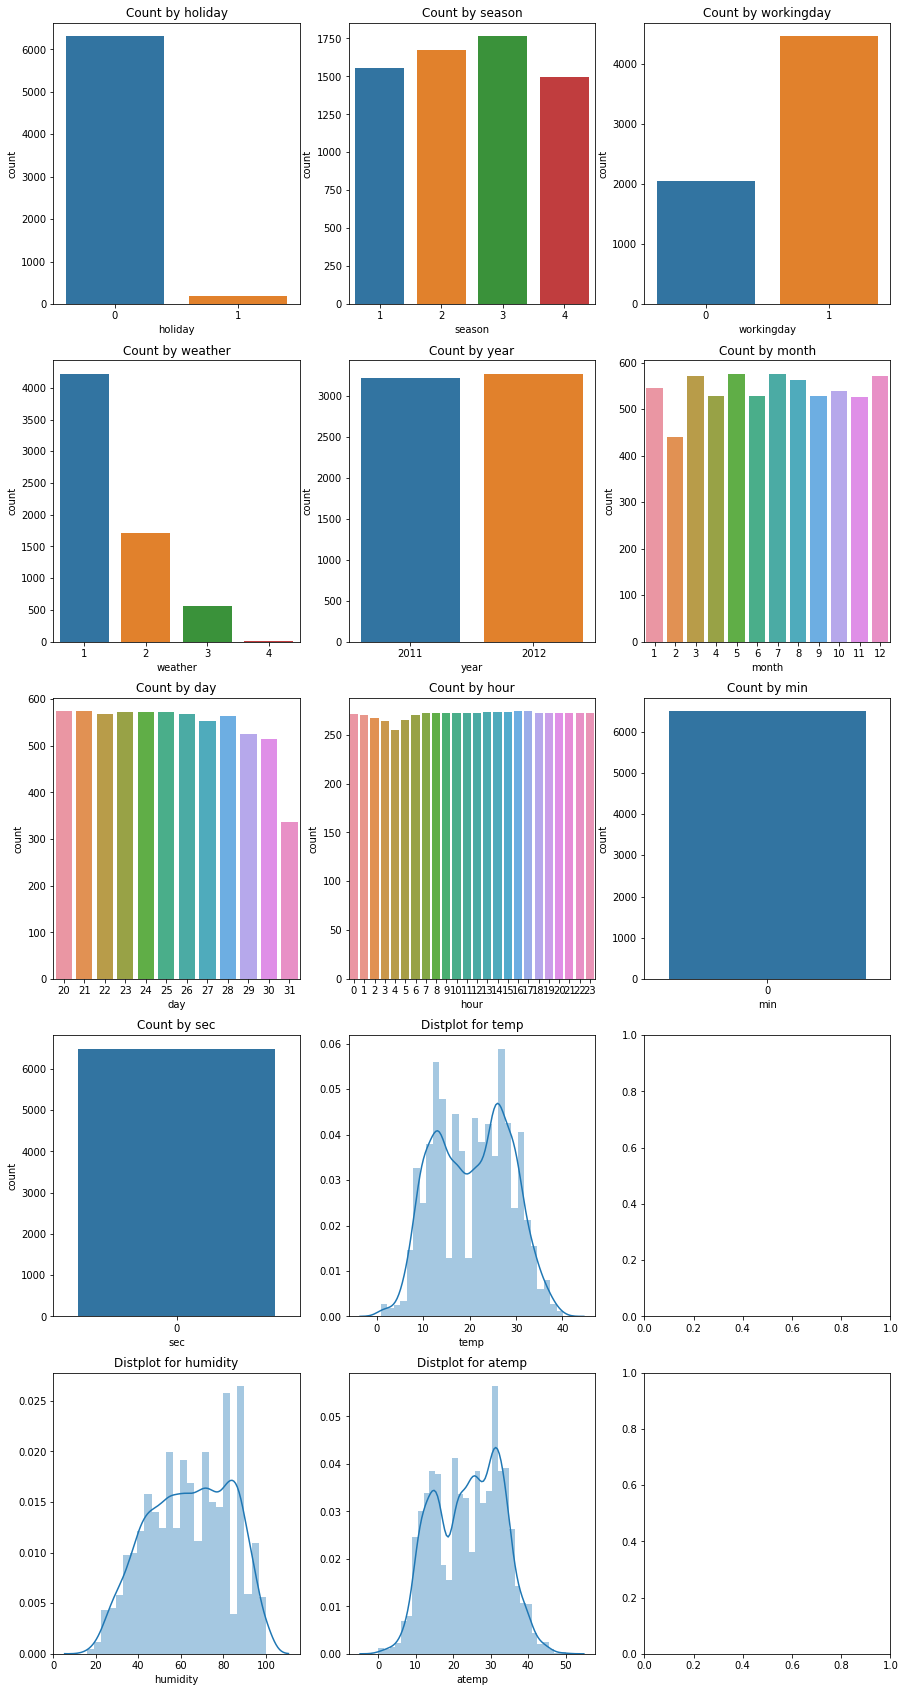

In [13]:
nrows = 5
ncols = 3
figure, axes = plt.subplots(nrows = nrows, ncols = ncols)
figure.set_size_inches(15,30)
# figure.set(title = "Frequency")


# Categorical varible 의 category별 frequency 비교
for i in range(len(categorical_columns)):
    row_index = i // ncols
    col_index = i % ncols
    sns.countplot(test[categorical_columns[i]], ax = axes[row_index][col_index])
    axes[row_index][col_index].set_title("Count by " + categorical_columns[i])


# Numerical variable의 distribution
for i in range(len(numerical_columns)):
    if i == 1:
        continue
    row_index = (i + len(categorical_columns)) // ncols
    col_index = (i + len(categorical_columns)) % ncols
    sns.distplot(test[numerical_columns[i]], ax = axes[row_index][col_index])
    axes[row_index][col_index].set_title("Distplot for " + numerical_columns[i])

In [14]:
train.head()

,temp,weather,windspeed,humidity,atemp,season,holiday,workingday,count,year,month,day,hour,min,sec
0,9.84,1,0.0,81,14.395,1,0,0,16,2011,1,1,0,0,0
1,9.02,1,0.0,80,13.635,1,0,0,40,2011,1,1,1,0,0
2,9.02,1,0.0,80,13.635,1,0,0,32,2011,1,1,2,0,0
3,9.84,1,0.0,75,14.395,1,0,0,13,2011,1,1,3,0,0
4,9.84,1,0.0,75,14.395,1,0,0,1,2011,1,1,4,0,0


105


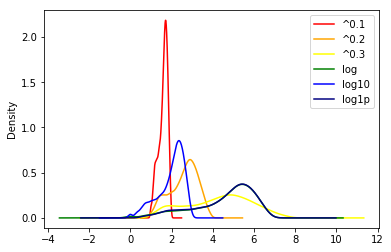

In [15]:
# count의 distplot이 왼쪽으로 skewed되어 있으므로 log변환이 필요하다
# windspeed의 값이 0인게 많은데 결측치로 생각할 수 있다
print(train["count"][train["count"] < 2].count()) # train set에서 count가 0인 값이 있는지 확인

np.power(train["count"], 0.1).plot(color="red", kind="density", )
np.power(train["count"], 0.2).plot(color="orange", kind="density")
np.power(train["count"], 0.3).plot(color="yellow", kind="density")
np.log(train["count"]).plot(color="green", kind="density")
np.log10(train["count"]).plot(color="blue", kind="density")
np.log1p(train["count"]).plot(color="navy", kind="density")
plt.legend(["^0.1","^0.2","^0.3","log","log10","log1p"])

In [16]:
# log변환이 가장 정규분포에 가까움
train_log = train.loc[:, train.columns != "count"]

In [17]:
train_log["log_count"] = np.log(train["count"])

In [18]:
train.head()

,temp,weather,windspeed,humidity,atemp,season,holiday,workingday,count,year,month,day,hour,min,sec
0,9.84,1,0.0,81,14.395,1,0,0,16,2011,1,1,0,0,0
1,9.02,1,0.0,80,13.635,1,0,0,40,2011,1,1,1,0,0
2,9.02,1,0.0,80,13.635,1,0,0,32,2011,1,1,2,0,0
3,9.84,1,0.0,75,14.395,1,0,0,13,2011,1,1,3,0,0
4,9.84,1,0.0,75,14.395,1,0,0,1,2011,1,1,4,0,0


In [19]:
corr = train.loc[:, train.columns != "log_count"].corr()
corr[np.abs(corr) > 0.1]

,temp,windspeed,humidity,atemp,count
temp,1.000000,NaN,NaN,0.984948,0.394454
windspeed,NaN,1.000000,-0.318607,NaN,0.101369
humidity,NaN,-0.318607,1.000000,NaN,-0.317371
atemp,0.984948,NaN,NaN,1.000000,0.389784
count,0.394454,0.101369,-0.317371,0.389784,1.000000


In [20]:
# wind speed와 다른 변수들간의 상관관계가 낮기 때문에 최빈값으로 imputation, sklearn에 imputer 활용해 볼 것
# 상관관계가 있다면 회귀나 다른 방법을 고려해야 할 것
# humidity와 음의 상관관계가 있으므로 회귀 사용해야 더 정확 18-06-08

train["windspeed"].value_counts().iloc[:2,]

0.0000    1313
8.9981    1120
Name: windspeed, dtype: int64

In [21]:
windspeed_mode = 8.9981
train.loc[train["windspeed"] == 0, "windspeed"] = windspeed_mode
test.loc[test["windspeed"] == 0, "windspeed"] = windspeed_mode

In [22]:
corr = train.loc[:, train.columns != "log_count"].corr()
corr

,temp,windspeed,humidity,atemp,count
temp,1.000000,-0.029845,-0.064949,0.984948,0.394454
windspeed,-0.029845,1.000000,-0.326428,-0.064894,0.093629
humidity,-0.064949,-0.326428,1.000000,-0.043536,-0.317371
atemp,0.984948,-0.064894,-0.043536,1.000000,0.389784
count,0.394454,0.093629,-0.317371,0.389784,1.000000


In [23]:
# atemp와 temp의 상관계수가 높으므로 atemp는 삭제
# humidity와 windspeed간의 상관관계가 크게 변하지 않았으므로 최빈값 대체한 거 사용해도 괜찮을 듯
train = train.drop(["atemp"], axis=1)
test = test.drop(["atemp"], axis=1)

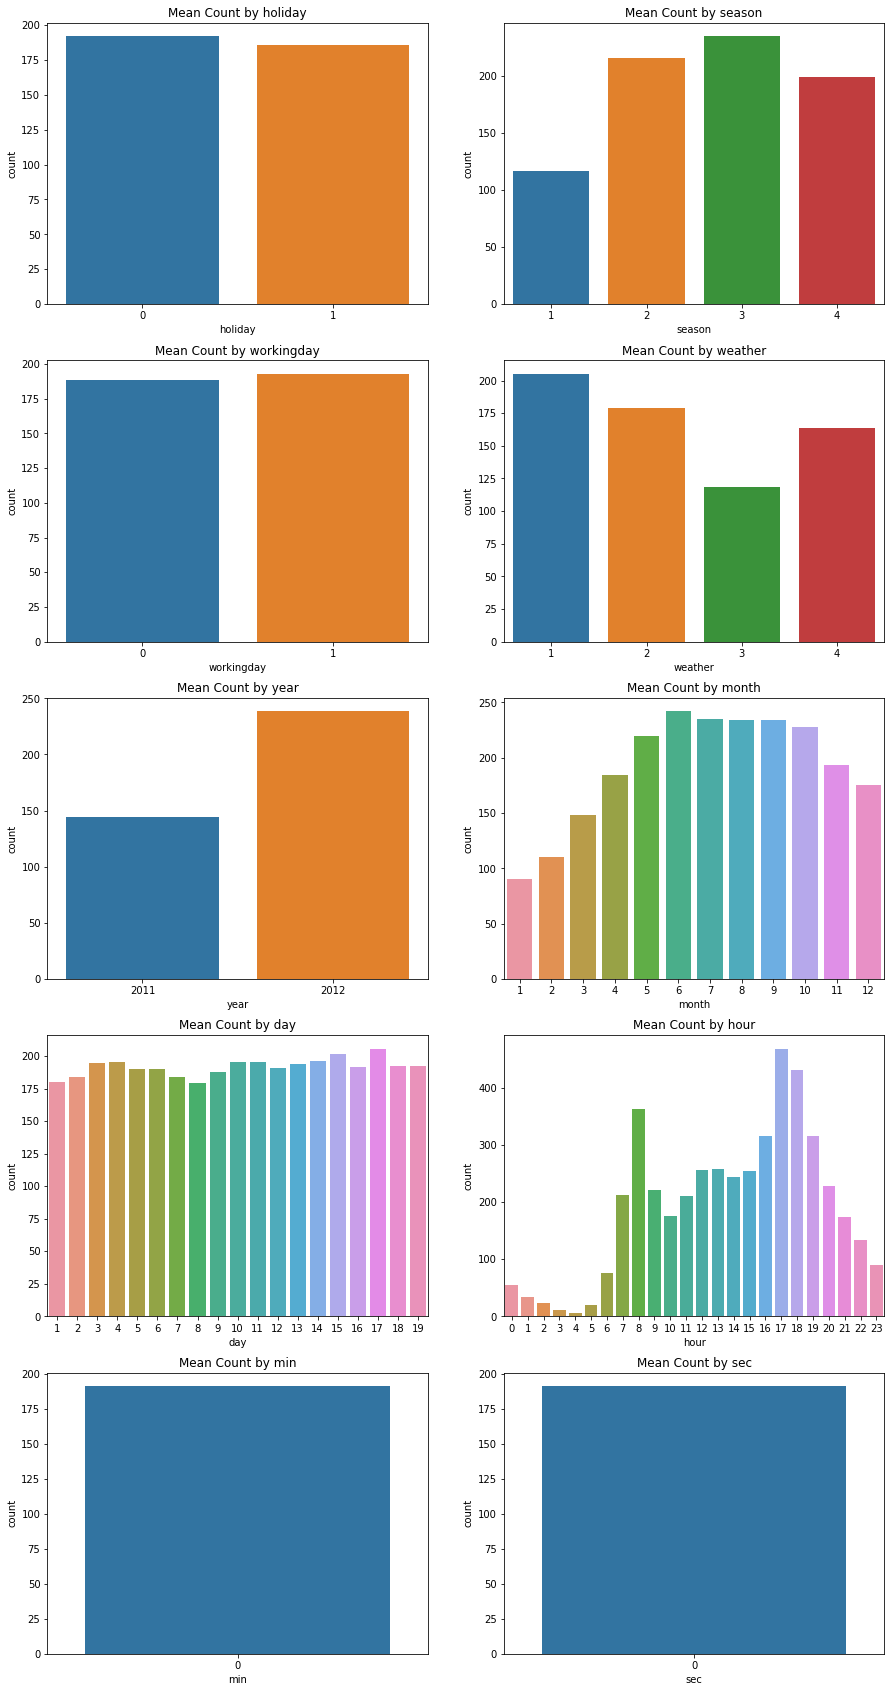

In [24]:
ncols = 2
nrows = 5
figure, axes = plt.subplots(nrows=nrows, ncols=ncols)
figure.set_size_inches(15,30)

for i in range(len(categorical_columns)):
    sns.barplot(data = train, x = categorical_columns[i], y = "count", ax = axes[i // ncols][i % ncols], ci=None) # ci = confidence interval
    axes[i // ncols][i % ncols].set(ylabel="count", xlabel=categorical_columns[i], title="Mean Count by " + categorical_columns[i])

In [25]:
# test set에 19일 이전의 data가 있는지 확인 => 없음, day가 categorical로 바껴서 에러뜸, 고치기
# test["day"][test["day"] < 20].count()

In [26]:
# 분, 초는 의미가 없으므로 삭제, train set에 day는 19일까지 밖에 없고 test set에 20일 이후가 있으므로 의미있게 사용할 수 없으므로 삭제
# holiday랑 workingday도 count에 별 차이가 없어보이므로 삭제,  t-test를 해야 좀 더 정확
drop_list = ["min", "sec", "day", "holiday", "workingday"] # 삭제할 column list
categorical_columns = list(set(categorical_columns) - set(drop_list))
train = train.drop(drop_list, axis=1)
test = test.drop(drop_list, axis=1)

In [27]:
#check_independence_list = ["season","weather","year","month","hour"] # check할 categorical variable들 목록
p_val_mat = np.zeros((len(categorical_columns),len(categorical_columns))) # 빈 matrix 생성

for i in range(len(check_independence_list)):
    for j in range(i+1, len(check_independence_list)):
        table = pd.crosstab(train[check_independence_list[i]], train[check_independence_list[j]])
        p_value = sci.stats.chi2_contingency(table)[1] # p-value
        p_val_mat[i][j] = p_value
        print("p-value of independence test between " + check_independence_list[i]
              + " and " + check_independence_list[j] + " : " + "%.10f" %p_value) # p-value가 낮으면 두 변수가 독립이 아니다.
        
pd.DataFrame(np.round(p_val_mat, 4), index=categorical_columns, columns=categorical_columns)
# seanson-weather, season-month, weather-month, weather-hour가 서로 관련이 있는 것으로 나온다 => 나중에 interaction 추가

NameError: name 'check_independence_list' is not defined

In [28]:
train_dummy = pd.get_dummies(train) # categorical variable을 dummy화
test_dummy = pd.get_dummies(test)

In [29]:
train_log.to_csv("datasets/train_log_EDA.csv", index=False)
train_dummy.to_csv("datasets/train_dummy_EDA.csv", index=False)
train.to_csv("datasets/train_EDA.csv", index=False)
test.to_csv("datasets/test_EDA.csv", index=False)
test_dummy.to_csv("datasets/test_dummy_EDA.csv", index=False)

In [30]:
train_dummy.head()

,temp,windspeed,humidity,count,weather_1,weather_2,weather_3,weather_4,season_1,season_2,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,9.84,8.9981,81,16,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,9.02,8.9981,80,40,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,9.02,8.9981,80,32,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,9.84,8.9981,75,13,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,9.84,8.9981,75,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
train.head()

,temp,weather,windspeed,humidity,season,count,year,month,hour
0,9.84,1,8.9981,81,1,16,2011,1,0
1,9.02,1,8.9981,80,1,40,2011,1,1
2,9.02,1,8.9981,80,1,32,2011,1,2
3,9.84,1,8.9981,75,1,13,2011,1,3
4,9.84,1,8.9981,75,1,1,2011,1,4


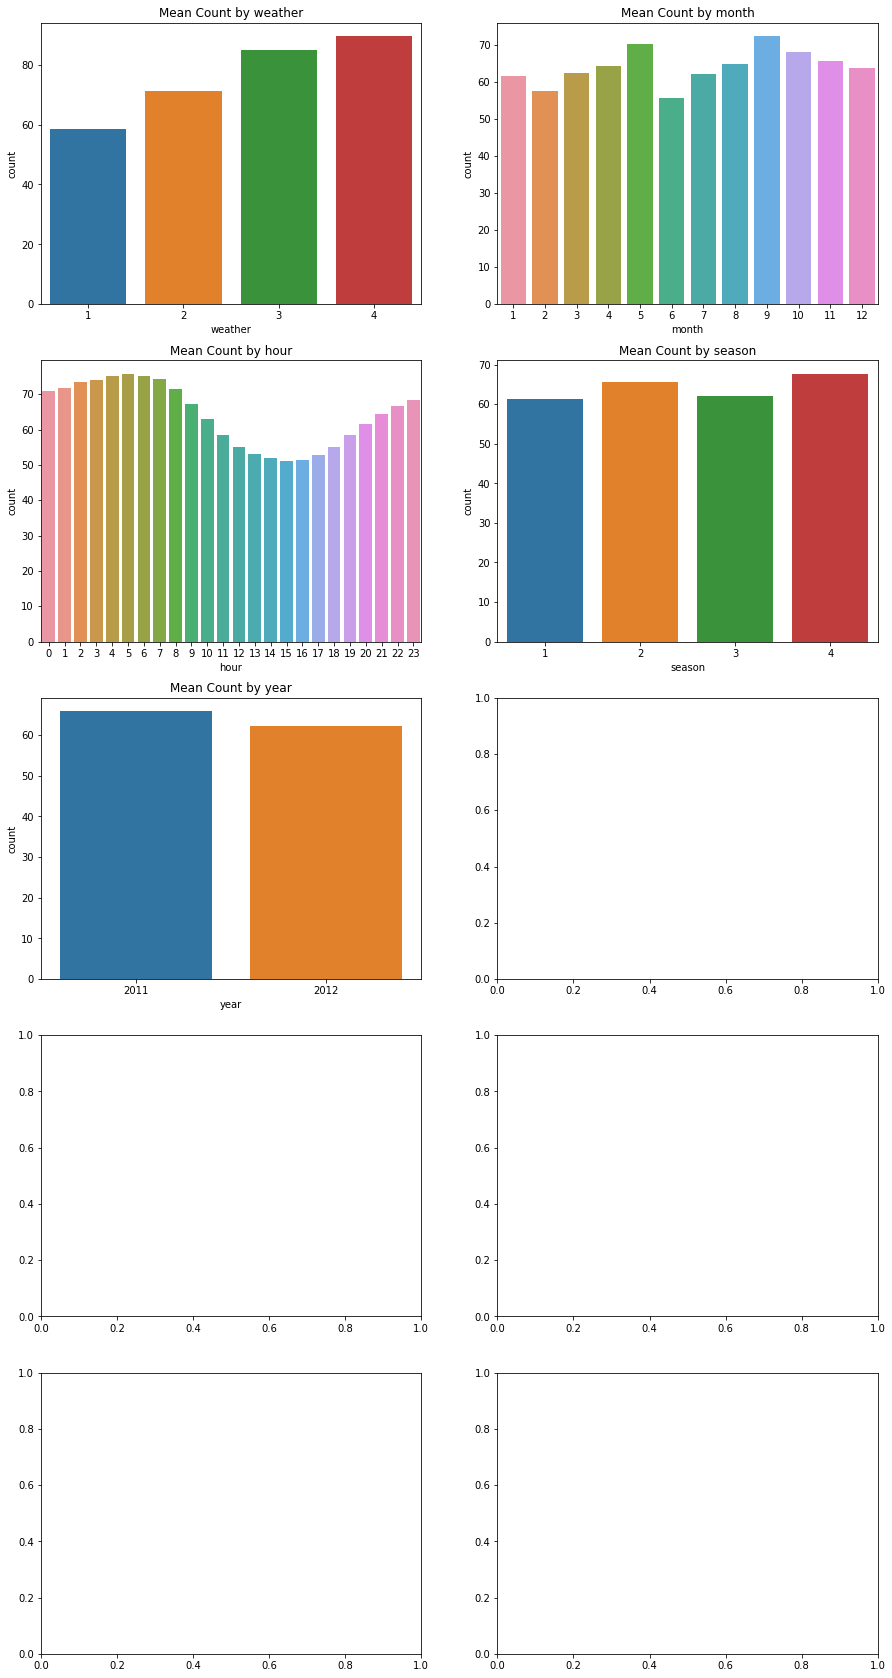

In [32]:
ncols = 2
nrows = 5
figure, axes = plt.subplots(nrows=nrows, ncols=ncols)
figure.set_size_inches(15,30)

for i in range(len(categorical_columns)):
    sns.barplot(data = test, x = categorical_columns[i], y = "humidity", ax = axes[i // ncols][i % ncols], ci=None) # ci = confidence interval
    axes[i // ncols][i % ncols].set(ylabel="count", xlabel=categorical_columns[i], title="Mean Count by " + categorical_columns[i])